# 데이터 전처리

## 0.환경준비

### 0.1 Import

In [1]:
# 기본 라이브러리 가져오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

/Users/cyeongy/opt/anaconda3/envs/kt-aivle/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 0.2 Data Loading

In [2]:
# titanic
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv'
titanic = pd.read_csv(path, usecols = ['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked'])
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [3]:
# airquality
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv'
air = pd.read_csv(path)
air.head()

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05


## 1.전처리

### 1) 데이터 분할

* x, y 분할하기

In [4]:
target = 'Survived'
x = titanic.drop(target, axis = 1)
y = titanic.loc[:, target]

* train, validation, test 분할은 머신러닝 과정에서 다룹니다.

### 2) NaN 조치

#### ① 결측치 확인

In [5]:
x.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

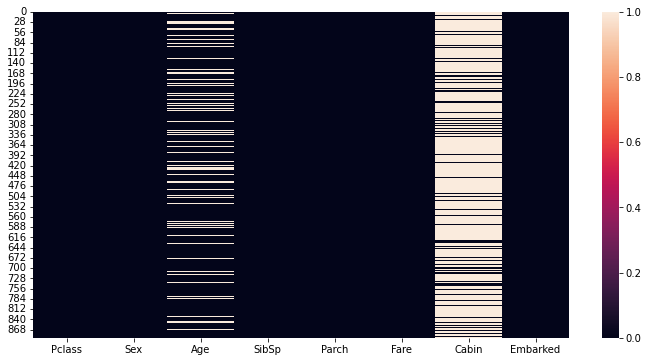

In [6]:
plt.figure(figsize = (12,6))
sns.heatmap(x.isna())
plt.show()

#### ② 결측치 제거

In [ ]:
temp = x.copy()

In [ ]:
temp.shape

* 행 제거

In [ ]:
temp.dropna(axis = 0, inplace = True)
temp.isna().sum()

In [ ]:
temp.shape

* 열 제거

In [ ]:
# x에서 Cabin 열을 삭제합시다.

print(x.shape)
x = x.drop(['Cabin'], axis=1)

# 행,열의 수를 확인하시오.
print(x.shape)

#### ③ 결측치 채우기

* .fillna
    * 단일값 : .fillna(0)
    * 이전 값, 이후 값 : .fillna(method = 'ffill'),  method = 'bfill'

In [ ]:
air

In [ ]:
temp = air.copy()
temp.head(7)

* 단일값으로 채우기

In [ ]:
# 단일값으로 채우는 것처럼 조회
temp.fillna(0).head(7)

In [ ]:
temp.head(7)

In [ ]:
# 단일값으로 진짜 채우기
temp.fillna(0, inplace = True)
temp.head(7)

* 이전값, 이후값으로 채우기

In [ ]:
temp = air.copy()

In [ ]:
# 이전 값으로 채우기
temp.fillna(method = 'ffill').head(7)

In [ ]:
# 이후 값으로 채우기

temp.fillna(method='bfill').head(7)

* 전,후 사이값으로 채우기 
    * .interpolate(method = 'linear')

In [ ]:
temp.interpolate(method='linear').head(7)

* x 에서 값 채우기
    * Age에 대해 평균값으로, x['Age'].mean()
    * Embarked에 대해 최빈값으로 채워 봅시다. x['Embarked'].mode()

In [ ]:
x.head()

In [ ]:
x.isna().sum()

In [ ]:
mean_age = x['Age'].mean()
mode_embarked = x['Embarked'].mode()

In [ ]:
x['Age'].fillna(mean_age, inplace=True)
x.isna().sum()

In [ ]:
x['Embarked'].fillna(mode_embarked[0], inplace=True)
x.isna().sum()

### 3) 가변수화

* 모델링을 위해서 모든 데이터 값은 숫자 여야 합니다.
* 숫자 형식이 아니라 의미상 숫자
    * 타이타닉 데이터의 pclass(객실등급)가 1,2,3 입니다. 이는 숫자 형식이지만 숫자의 의미는 아닙니다. (3등급 객실의 3이 1등급 객실의 1에 3배의 의미는 아니라는 말입니다.)
* 그러므로 모든 범주형 변수는 모두 (이미 0,1로 되어 있는 변수를 빼고) 가변수화를 수행해야 합니다.

In [ ]:
x.head()

In [ ]:
col_dumm = ['Pclass', 'Sex', 'Embarked']
x = pd.get_dummies(x, columns = col_dumm, drop_first = True)
x.head()

* drop_first = True : 가변수화 시, 첫번째 범주 열은 삭제. ==> 하나를 빼도 모든 범주 표현 가능.

### 4) 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

* 정규화(Normalization, MinMax 방식)
    * 모든 값을 0 ~ 1 로.

In [ ]:
# 선언하기
scaler = MinMaxScaler()

# 만들고 적용 .fit_transform()   : .fit() + .transform()
x1 = scaler.fit_transform(x)
# 적용하고 나면 넘파이 어레이가 된다.

# 모델링할 때에는 넘파이 어레이여도 상관 없지만, 우리가 편하게 살펴보기 위해 데이터프레임으로 변환합니다.
x1 = pd.DataFrame(x1, columns = list(x))
x1.head()

* 표준화(Standardization)
    * 평균은 0, 표준편차 1 로

In [ ]:
# 선언하기
scaler = StandardScaler()

# 만들고 적용 .fit_transform()   : .fit() + .transform()
x2 = scaler.fit_transform(x)
# 적용하고 나면 넘파이 어레이가 된다.

# 모델링할 때에는 넘파이 어레이여도 상관 없지만, 우리가 편하게 살펴보기 위해 데이터프레임으로 변환합니다.
x2 = pd.DataFrame(x2, columns = list(x))
x2.head()

* 값들을 살펴봅시다.

In [ ]:
x.describe()

In [ ]:
x1.describe()

In [ ]:
x2.describe()

-----

# 카시트 판매량 데이터

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

* 비즈니스 상황
    * 고객사는 국내(미국)와 국외에서 카시트를 판매하는 회사입니다.
    * 최근 경쟁사의 공격적인 마케팅으로 매출이 감소하고 있습니다.
    * 데이터 분석을 위한 전처리를 수행해 봅시다.



|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature|
|	Income 	|	 지역 주민 평균소득(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|
|	Education 	|	 평균학력수준(범주 : 11~17)	|	feature	|


## 0.환경준비

### 0.1 Import

In [ ]:
# 기본 라이브러리 가져오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### 0.2 Data Loading

In [ ]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseat_train.csv'
data = pd.read_csv(path)
data.head()

## 1.데이터 탐색

* 기초 통계량
    * .describe()
    * 시리즈 혹은 데이터프레임에 붙여서 사용하는 메서드.
    * .T : transpose. 행/열 위치를 바꿈.

In [ ]:
data.describe().T

* 진열상태 별 판매량 조회

In [ ]:
data.groupby('ShelveLoc', as_index = False)['Sales'].mean()

## 2.데이터 전처리 

In [ ]:
target = 'Sales'

### 2.1 데이터를 feature와 , target으로 분할

In [ ]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### 2.2 NaN에 대한 조치

In [ ]:
x.isna().sum()

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# 선언
imputer = SimpleImputer(strategy='mean')

# 대상 리스트
impute_list = ['CompPrice', 'Income']

# 피팅하고 적용하기
x[impute_list] = imputer.fit_transform(x[impute_list])
x.isna().sum()

### 2.3 가변수화
* 범주형 데이터이면서 값이 0,1 로 되어 있는 것이 아니라면, 가변수화를 수행해야 합니다.
* 대상이 되는 변수에 대해서 가변수화를 수행해주세요.

In [ ]:
dum_cols = ['ShelveLoc','US','Urban','Education']

x = pd.get_dummies(x, columns = dum_cols ,drop_first = True)
x.head()


### 2.4 스케일링 
* 스케일링을 필요로 하는 알고리즘이 있습니다. 
* 필요하다고 판단될때 수행합니다.

* MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
col_x = list(x)
scaler = MinMaxScaler()
x_s = scaler.fit_transform(x)

# 데이터프레임으로 다시 만듭시다.
x_s = pd.DataFrame(x_s, columns=col_x)
x_s.head()


In [ ]:
x.describe()

In [ ]:
x_s.describe()

* StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
col_x = list(x)
scaler = StandardScaler()
x_s = scaler.fit_transform(x)

# 데이터프레임으로 다시 만듭시다.
x_s = pd.DataFrame(x_s, columns=col_x)
x_s.head()


In [ ]:
x.describe()

In [ ]:
x_s.describe()

-----

# 이동통신 고객 이탈 예측

* 여러분은 OO 통신회사 데이터분석가 입니다.
* 회사는 약정기간이 끝난 고객이 번호이동(이탈)해 가는 문제를 해결하고자 합니다.
* 어떤 고객이 번호이동(이탈)해 가는지 데이터분석을 의뢰하였습니다.
* 분석을 위한 데이터 전처리를 수행해 봅시다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2) 데이터 로딩

In [ ]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
data = pd.read_csv(data_path)
data.head()

|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0) - 범주	|		|
|	INCOME	|	연 수입액(달러)	|		|
|	OVERAGE	|	월 초과사용 시간(분)	|		|
|	LEFTOVER	|	월 사용 잔여시간비율(%)	|		|
|	HOUSE	|	집 가격(달러)	|		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|		|
|	OVER_15MINS_CALLS_PER_MONTH	|	 평균 장기통화(15분 이상) 횟수	|		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' ) - 범주	|		|
|	REPORTED_USAGE_LEVEL	|	사용 수준 설문('very_little', 'little', 'avg', 'high', 'very_high') - 범주	|		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it') - 범주	|		|
|	**CHURN**	|	이탈여부(1 : 이탈, 0 : 잔류)	|	**Target**	|


----

## 1.데이터 탐색

## 2.데이터 전처리 

### 2.1 데이터 feature와 , target으로 분할

In [ ]:
y = data['CHURN']
x = data.drop(['id', 'CHURN'], axis=1)

In [ ]:
x.head()

In [ ]:
y.head()

### 2.2 NaN에 대한 조치
* 데이터에 포함된 NaN에 대해서 조치 방법을 결정하고 적용합니다.
* **조치방법을 결정한 이유**를 주석으로 기술합니다.

In [ ]:
x.isna().sum()

In [ ]:
x.info()

In [ ]:
# HOUSE 컬럼의 평균값으로 NaN 값을 처리!

x['HOUSE'].fillna(x['HOUSE'].mean(), inplace=True)
x.isna().sum()

In [ ]:
# REPORTED_SATISFACTION 컬럼은 최빈값으로 NaN 값을 처리!

x['REPORTED_SATISFACTION'].fillna(x['REPORTED_SATISFACTION'].mode()[0], inplace=True)

x.isna().sum()

### 2.3 가변수화
* 범주형 데이터이면서 값이 0,1 로 되어 있는 것이 아니라면, 가변수화를 수행해야 합니다.
* 대상이 되는 변수에 대해서 가변수화를 수행해주세요.

In [ ]:
x.head()

In [ ]:
dummies = ['REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']

x = pd.get_dummies(x, columns=dummies, drop_first=True)

In [ ]:
x.head()

In [ ]:
x.columns

### 2.4 스케일링 
* 스케일링을 필요로 하는 알고리즘이 있습니다. 
* 필요하다고 판단될때 수행합니다.

In [ ]:
## INCOME, HOUSE 컬럼에 대하여 min-max scale 적용

x.describe()

In [ ]:
scale_list = ['INCOME', 'HOUSE']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mm_scaler = MinMaxScaler()

In [ ]:
x[scale_list] = mm_scaler.fit_transform(x[scale_list])

In [ ]:
x.describe()